In [1]:
import os
import itertools
import numpy as np
import operator
import math
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

In [2]:
def grouper(n, iterable, fillvalue=None):
    args = [iter(iterable)] * n
    return itertools.zip_longest(*args, fillvalue=fillvalue)

In [12]:
doctopic_triples = []
mallet_docnames = []

In [13]:
with open("/home/odysseus/Bureau/ANR/code/topic_modelling/test-llda-doc-topics.txt") as f:
    f.readline()  # read one line in order to skip the header
    for line in f:
        docnum, docname, *values = line.rstrip().split('\t')
        if '184' in docname:
            mallet_docnames.append(docname[21:-4])
            print(docname[21:-4])
            index_topic=0
            for share in grouper(1, values):
                triple = (docname[21:-4], index_topic, float(share[0]))
                doctopic_triples.append(triple)
                index_topic+=1

Le-Comte-de-Monte-Cristo
Les-Trois-Mousquetaires
La-dame-aux-camelias
Vingt-ans-apres
La-Reine-Margot


In [14]:
print(doctopic_triples)

[('Le-Comte-de-Monte-Cristo', 0, 0.28266987531238014), ('Le-Comte-de-Monte-Cristo', 1, 0.70611590791892), ('Le-Comte-de-Monte-Cristo', 2, 0.006569437649578865), ('Le-Comte-de-Monte-Cristo', 3, 0.001227571434238189), ('Le-Comte-de-Monte-Cristo', 4, 0.003417207684882783), ('Les-Trois-Mousquetaires', 0, 0.42336649377887364), ('Les-Trois-Mousquetaires', 1, 0.5683088172774424), ('Les-Trois-Mousquetaires', 2, 0.001429583652183771), ('Les-Trois-Mousquetaires', 3, 0.006893971601054333), ('Les-Trois-Mousquetaires', 4, 1.133690445823768e-06), ('La-dame-aux-camelias', 0, 0.0013914475823056417), ('La-dame-aux-camelias', 1, 0.8266369015366609), ('La-dame-aux-camelias', 2, 0.0003077656646221201), ('La-dame-aux-camelias', 3, 0.17165955048874054), ('La-dame-aux-camelias', 4, 4.334727670734086e-06), ('Vingt-ans-apres', 0, 0.4718041336942471), ('Vingt-ans-apres', 1, 0.5128528255317999), ('Vingt-ans-apres', 2, 0.006342414729607394), ('Vingt-ans-apres', 3, 0.007702597408446645), ('Vingt-ans-apres', 4, 0.0

In [15]:
mallet_docnames = sorted(mallet_docnames)

In [16]:
num_docs = len(mallet_docnames)

In [17]:
doctopic_triples = sorted(doctopic_triples, key=operator.itemgetter(0,1))

In [18]:
num_topics = len(doctopic_triples) // len(mallet_docnames)
print(len(doctopic_triples))
print(num_topics)

25
5


In [19]:
doctopic = np.zeros((num_docs, num_topics))

In [20]:
for triple in doctopic_triples:
    docname, topic, share = triple
    row_num = mallet_docnames.index(docname)
    doctopic[row_num, topic] = share

In [21]:
novel_names = []

In [23]:
for fn in mallet_docnames:
    basename = os.path.basename(fn)
    name, ext = os.path.splitext(basename)
    name = name.rstrip('0123456789')
    novel_names.append(name)
print(len(novel_names))

5


In [24]:
novel_names = np.asarray(novel_names)

In [25]:
doctopic

array([[  3.62448778e-03,   5.23080999e-01,   1.18433620e-03,
          4.71813168e-01,   2.97008350e-04],
       [  1.39144758e-03,   8.26636902e-01,   3.07765665e-04,
          1.71659550e-01,   4.33472767e-06],
       [  2.82669875e-01,   7.06115908e-01,   6.56943765e-03,
          1.22757143e-03,   3.41720768e-03],
       [  4.23366494e-01,   5.68308817e-01,   1.42958365e-03,
          6.89397160e-03,   1.13369045e-06],
       [  4.71804134e-01,   5.12852826e-01,   6.34241473e-03,
          7.70259741e-03,   1.29802864e-03]])

In [26]:
doctopic_orig = doctopic.copy()

In [27]:
num_groups = len(set(novel_names))
print(num_groups)

5


In [28]:
doctopic_grouped = np.zeros((num_groups, num_topics))

In [29]:
for i, name in enumerate(sorted(set(novel_names))):
    doctopic_grouped[i, :] = np.mean(doctopic[novel_names == name, :], axis=0)

In [30]:
doctopic = doctopic_grouped

In [31]:
doctopic

array([[  3.62448778e-03,   5.23080999e-01,   1.18433620e-03,
          4.71813168e-01,   2.97008350e-04],
       [  1.39144758e-03,   8.26636902e-01,   3.07765665e-04,
          1.71659550e-01,   4.33472767e-06],
       [  2.82669875e-01,   7.06115908e-01,   6.56943765e-03,
          1.22757143e-03,   3.41720768e-03],
       [  4.23366494e-01,   5.68308817e-01,   1.42958365e-03,
          6.89397160e-03,   1.13369045e-06],
       [  4.71804134e-01,   5.12852826e-01,   6.34241473e-03,
          7.70259741e-03,   1.29802864e-03]])

In [32]:
CORPUS_PATH = os.path.join('txt', 'dumas')
print(CORPUS_PATH)
filenames = sorted([os.path.join(CORPUS_PATH, fn) for fn in os.listdir(CORPUS_PATH)])

txt/dumas


In [33]:
N, K = doctopic.shape
print(K)

5


In [34]:
ind = np.arange(N)

In [35]:
width = 0.5

In [36]:
plt.rcParams["figure.figsize"] = [16,9]

In [37]:
plt.bar(ind, doctopic[:,0], width=width)

<Container object of 5 artists>

In [38]:
plt.xticks(ind + width/2, novel_names)

([<matplotlib.axis.XTick at 0x7f55dc1fc5c0>,
 <a list of 5 Text xticklabel objects>)

In [39]:
plt.title('Share of Topic #0')

Text(0.5,1,'Share of Topic #0')

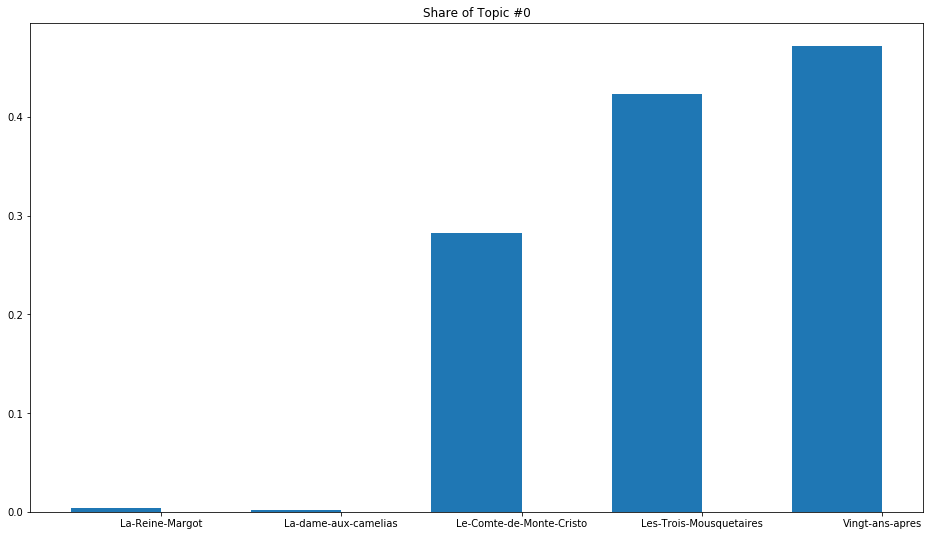

In [40]:
plt.show()

In [41]:
plots = []

In [42]:
height_cumulative = np.zeros(N)

In [43]:
for k in range(K):
    print(K)
    color = plt.cm.coolwarm(k/K, 1)
    if k == 0:
        p = plt.bar(ind, doctopic[:, k], width, color=color)
    else:
        p = plt.bar(ind, doctopic[:, k], width, bottom=height_cumulative, color=color)
        height_cumulative += doctopic[:, k]
    plots.append(p)

5
5
5
5
5


In [44]:
plt.ylim((0, 1))

(0, 1)

In [45]:
plt.ylabel('Topics')

Text(0,0.5,'Topics')

In [46]:
plt.title('Topics in novels')

Text(0.5,1,'Topics in novels')

In [47]:
plt.xticks(ind+width/2, novel_names)

([<matplotlib.axis.XTick at 0x7f55a9ee81d0>,
 <a list of 5 Text xticklabel objects>)

In [48]:
plt.yticks(np.arange(0, 1, 10))

([<matplotlib.axis.YTick at 0x7f55a9ee8a90>],
 <a list of 1 Text yticklabel objects>)

In [49]:
topic_labels = ['Topic #{}'.format(k) for k in range(K)]

In [50]:
plt.legend([p[0] for p in plots], topic_labels)

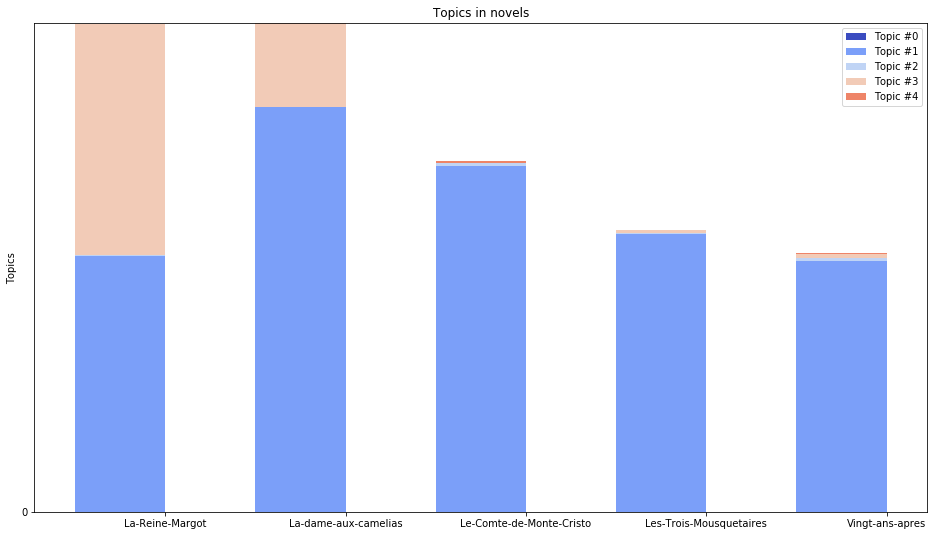

In [51]:
plt.show()